In [1]:

%matplotlib inline
import pandas as pd
import itertools

from matplotlib import pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

datatypelist=[]
f1="/Users/irffanalahi/Research/Research_update/Dataqc/allqc_together/myversion/HealthycfDNAandWBQC-072721_cfdonly.txt"
df1=pd.read_csv(f1,sep="\t",index_col=0)
tmpdata='New healthy'
df1['data']=tmpdata
datatypelist.append(tmpdata)

f2="/Users/irffanalahi/Research/Research_update/Dataqc/allqc_together/myversion/HealthycfDNAWGBS.txt"
df2=pd.read_csv(f2,sep="\t",index_col=0)
tmpdata='Previous healthy'
df2['data']=tmpdata
datatypelist.append(tmpdata)

f3="/Users/irffanalahi/Research/Research_update/Dataqc/allqc_together/myversion/CRC_cfDNA_072821.txt"
df3=pd.read_csv(f3,sep="\t",index_col=0)
tmpdata='CRC'
df3['data']=tmpdata
datatypelist.append(tmpdata)


outputfile=f3

dflist=[df1,df2,df3] ###########


#valuevars=['cB','CD4','CD8','iDC','M0','M1','M2','mDC','Mn','mNeu','nB','NK','PC']
valuevars=['Plasma vol. (ml)','cfDNA con. QUBIT (ng/ul)','Total cfDNA amount (ng)','cfDNA amount/ml plasma (ng/ml)','cfDNA used for Lib prep (ng)','cfDNA (ng) for BS conversion','BA percentage  70bp-450bp','0.5% Lambda DNA spike-in (ng)','Indexing PCR cycles','Final Lib. Conc. (ng/ul)','Elution vol. (ul)','Total amount of Lib (ng)','Library Avg. Fragment size (Bioanalyzer)','nM of Library/ul']  #'dsDNA-MW (660) x Avg. Fragment size'

len(valuevars)

14

In [2]:

alldf = pd.concat(dflist)
alldf.to_csv(f1+"_alldf.txt",sep="\t")
alldf[valuevars].to_csv(f1+"_alldf_corress.txt",sep="\t")
alldf.head()

,Pateint vs. Healthy,Category,Plasma vol. (ml),cfDNA con. QUBIT (ng/ul),Total cfDNA amount (ng),cfDNA amount/ml plasma (ng/ml),BA percentage 70bp-450bp,cfDNA amount (ng) scaled to 75% BA 70-450bp,cfDNA used for Lib prep (ng),cfDNA (ng) for BS conversion,...,nM of Library/ul,% NA,Median Depth,Median Fragment length,data,Time Point Pre/Post,Total cfDNA amt (ng) including previous extractions,Unnamed: 20,Response?,Bioanalyzer done on extracted cfDNA
Sample ID,,,,,,,,,,,,,,,,,,,,,
NU-05-cfDNA,Healthy,Plasma,8.0,1.74,130.8,16.3,87,NaN,90.0,90.0,...,10.89,NaN,NaN,NaN,New healthy,NaN,NaN,NaN,NaN,NaN
NU-14-cfDNA,Healthy,Plasma,9.0,1.44,108.0,12.0,76,NaN,90.0,90.0,...,5.59,NaN,NaN,NaN,New healthy,NaN,NaN,NaN,NaN,NaN
NU-31-cfDNA,Healthy,Plasma,10.0,1.56,117.0,11.7,80,NaN,90.0,90.0,...,17.17,NaN,NaN,NaN,New healthy,NaN,NaN,NaN,NaN,NaN
NU-24-cfDNA,Healthy,Plasma,6.0,0.88,66.0,11.0,83,NaN,66.0,66.0,...,23.67,NaN,NaN,NaN,New healthy,NaN,NaN,NaN,NaN,NaN
NU-35-cfDNA,Healthy,Plasma,7.0,0.81,61.0,8.7,69,97.83,61.0,61.0,...,19.41,NaN,NaN,NaN,New healthy,NaN,NaN,NaN,NaN,NaN


In [3]:
mdf = pd.melt(alldf, id_vars=['data'], value_vars=valuevars)

In [4]:
def combine_box_pairs(samples, cell_types):
    box_pairs = []
    for cell in cell_types:
        pairs = []
        for sample in samples:
            pairs.append((cell, sample))
        for i in range(len(samples)):
            try:
                box_pairs.append((pairs[i], pairs[i + 1]))
            except IndexError:
                box_pairs.append((pairs[i], pairs[0]))
    return box_pairs

Box_pairs = combine_box_pairs(datatypelist, valuevars)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cfDNA con. QUBIT (ng/ul)_Previous healthy v.s. cfDNA con. QUBIT (ng/ul)_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.498e-02 U_stat=6.400e+01
Total cfDNA amount (ng)_New healthy v.s. Total cfDNA amount (ng)_Previous healthy: Mann-Whitney-Wilcoxon test two-sided, P_val=1.932e-02 U_stat=3.100e+01
Total cfDNA amount (ng)_Previous healthy v.s. Total cfDNA amount (ng)_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=2.312e-02 U_stat=6.850e+01
cfDNA amount/ml plasma (ng/ml)_New healthy v.s. cfDNA amount/ml plasma (ng/ml)_Previous healthy: Mann-Whitney-Wilcoxon test two-sided, P_val=3.034e-04 U_stat=1.350e+02
cfDNA amount/ml plasma (ng/ml)_Previous healthy v.s. cfDNA amount/ml plasma (ng/ml)_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=2.129e-06 U_stat=0.000e+00
cfDNA used for Lib prep (ng)_New healthy v.s. cfDNA used for

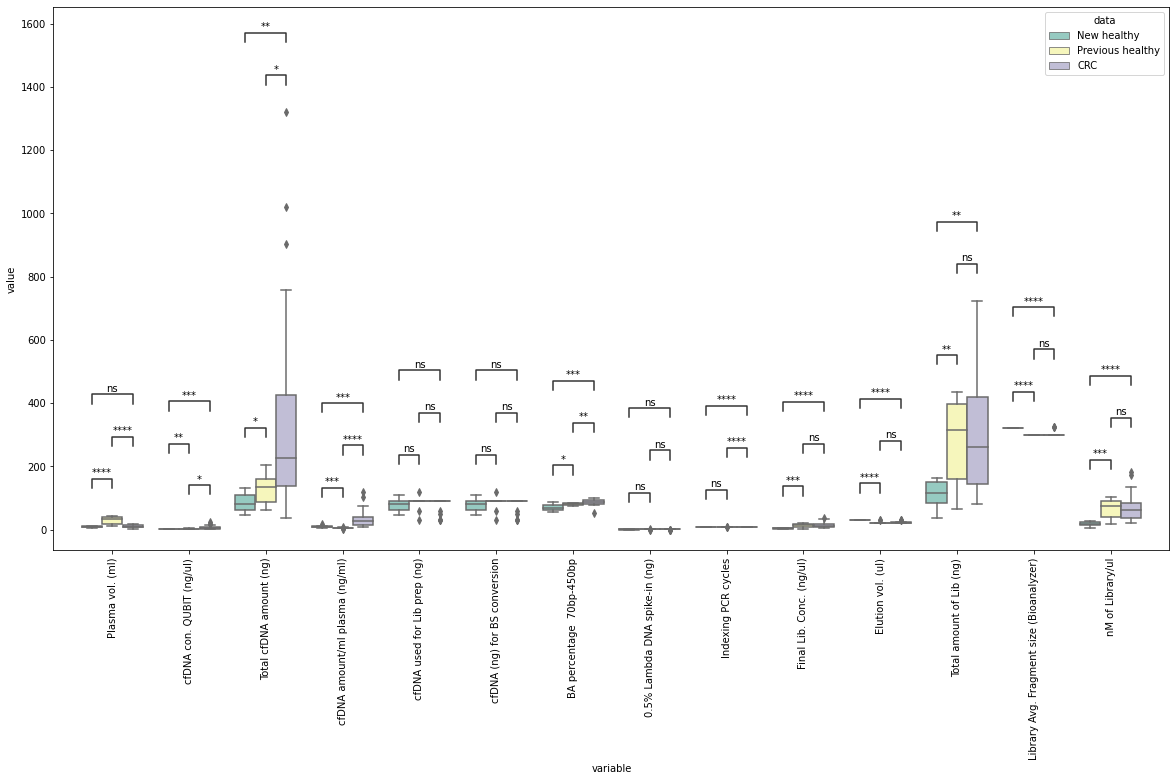

In [5]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", hue="data", data=mdf,palette="Set3") 

plt.setp(ax.get_xticklabels(), rotation=90)

# Box_pairs=[(("cB","New healthy"),("cB","CRC"))]

test_results = add_stat_annotation(ax,data=mdf, x="variable", y="value", hue="data",box_pairs=Box_pairs,
                                   test='Mann-Whitney', text_format='star', comparisons_correction=None)

plt.show()

#ax.figure.savefig(outputfile+".pdf",dpi=300, bbox_inches='tight')
#plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')